# Install and Import the libraries

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import operator

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.preprocessing import  Normalizer

from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_curve, auc
from sklearn.metrics import roc_auc_score,accuracy_score
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

from nltk.corpus import stopwords

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm

from collections import Counter
from scipy.sparse import hstack

#Code Reference: https://ptable.readthedocs.io/en/latest/tutorial.html
from prettytable import PrettyTable


In [2]:
# Read the data into Pandas Dataframe

project_data= pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print('Number of data points in the  Train dataset :',project_data.shape[0])
print("-"*53)
print('Number of features in the Train dataset :',project_data.shape[1])
print("-"*53)
print("List of Features in the Train dataset:\n",project_data.columns.values.tolist())

Number of data points in the  Train dataset : 109248
-----------------------------------------------------
Number of features in the Train dataset : 17
-----------------------------------------------------
List of Features in the Train dataset:
 ['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state', 'project_submitted_datetime', 'project_grade_category', 'project_subject_categories', 'project_subject_subcategories', 'project_title', 'project_essay_1', 'project_essay_2', 'project_essay_3', 'project_essay_4', 'project_resource_summary', 'teacher_number_of_previously_posted_projects', 'project_is_approved']


In [4]:
print('Number of data points in the  Resourse dataset :',resource_data.shape[0])
print("-"*55)
print('Number of features in the Resourse dataset :',resource_data.shape[1])
print("-"*55)
print("List of Features in the Resourse dataset:",resource_data.columns.values.tolist())

Number of data points in the  Resourse dataset : 1541272
-------------------------------------------------------
Number of features in the Resourse dataset : 4
-------------------------------------------------------
List of Features in the Resourse dataset: ['id', 'description', 'quantity', 'price']


In [5]:
cols=['Date' if each_col=='project_submitted_datetime' 
      else each_col for 
      each_col in project_data.columns.values.tolist()] 

project_data['Date']=pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime',axis=1,inplace=True)
project_data.sort_values(by=['Date'],inplace=True)

In [6]:
project_data=project_data[cols]

print("Sample records from  Training data ")
project_data.head()

Sample records from  Training data 


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1
51140,74477,p189804,4a97f3a390bfe21b99cf5e2b81981c73,Mrs.,CA,2016-04-27 00:46:53,Grades PreK-2,Literacy & Language,Literacy,Mobile Learning with a Mobile Listening Center,Having a class of 24 students comes with diver...,I have a class of twenty-four kindergarten stu...,By having a mobile listening and storage cente...,A mobile listening center will help keep equip...,My students need a mobile listening center to ...,10,1
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Applied Learning,Early Development,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Grades 3-5,Literacy & Language,Literacy,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",With the new common core standards that have b...,These remarkable gifts will provide students w...,My students need copies of the New York Times ...,2,1


In [7]:
print("Sample records from  Resourse data ")
resource_data.head()

Sample records from  Resourse data 


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


# Data Preprocessing

## chek for null values

In [8]:
print("Null values from Train data :\n")
print(project_data.isnull().sum())

Null values from Train data :

Unnamed: 0                                           0
id                                                   0
teacher_id                                           0
teacher_prefix                                       3
school_state                                         0
Date                                                 0
project_grade_category                               0
project_subject_categories                           0
project_subject_subcategories                        0
project_title                                        0
project_essay_1                                      0
project_essay_2                                      0
project_essay_3                                 105490
project_essay_4                                 105490
project_resource_summary                             0
teacher_number_of_previously_posted_projects         0
project_is_approved                                  0
dtype: int64


In [9]:
project_data['teacher_prefix'].fillna(method='ffill',inplace=True)

In [10]:
project_data['essay']=project_data.project_essay_1.map(str)+\
project_data.project_essay_2.map(str)+\
project_data.project_essay_3.map(str)+\
project_data.project_essay_4.map(str)


In [11]:
project_data.drop(columns=['project_essay_1','project_essay_2',
                           'project_essay_3','project_essay_4'],axis=1,inplace=True)

In [12]:
project_data.isnull().sum()

Unnamed: 0                                      0
id                                              0
teacher_id                                      0
teacher_prefix                                  0
school_state                                    0
Date                                            0
project_grade_category                          0
project_subject_categories                      0
project_subject_subcategories                   0
project_title                                   0
project_resource_summary                        0
teacher_number_of_previously_posted_projects    0
project_is_approved                             0
essay                                           0
dtype: int64

In [13]:
print("Null values from Train data :\n")
print(resource_data.isnull().sum())


Null values from Train data :

id               0
description    292
quantity         0
price            0
dtype: int64


In [14]:
resource_data['description'].fillna(method='ffill',inplace=True)

In [15]:
resource_data.isnull().sum()

id             0
description    0
quantity       0
price          0
dtype: int64

## Text Pre-processing

In [16]:
def processed_list(list_elements):
    processed_list=[]
    for i in list_elements:
        temp=''
        for j in i.split(','):
            if 'The' in j.split():
                j=j.replace('The','')
            j=j.replace(' ','')
            temp+=j.strip()+' '
            temp=temp.replace('&','_')
        processed_list.append(temp.strip())
    return processed_list

In [17]:
def get_sorted_dic(col):
    my_Counter=Counter() 
    for word in list(project_data[col]):
        my_Counter.update(word.split())   
    count_dict=dict(my_Counter)
    return dict(sorted(count_dict.items(),key=lambda x: x[1]))
    

### project_subject_categories

In [18]:
clean_categories=processed_list(list(project_data['project_subject_categories']))
project_data['clean_categories']=clean_categories
project_data.drop(['project_subject_categories'],axis=1,inplace=True)
sorted_cat_dict=get_sorted_dic('clean_categories')

### project_subject_subcategories

In [19]:
clean_sub_categories=processed_list(list(project_data['project_subject_subcategories']))
project_data['clean_sub_categories']=clean_sub_categories
project_data.drop(['project_subject_subcategories'],axis=1,inplace=True)
sorted_subcat_dict=get_sorted_dic('clean_sub_categories')

### essay

In [20]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [21]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [22]:
def text_processing(dataset,feature_name):
    processed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(dataset[feature_name].values):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        processed_text.append(sent.lower().strip())
    return processed_text

In [23]:
project_data['essay']=text_processing(project_data,'essay')

100%|██████████| 109248/109248 [01:10<00:00, 1551.40it/s]


### project_title

In [24]:
project_data['project_title']=text_processing(project_data,'project_title')

100%|██████████| 109248/109248 [00:03<00:00, 34155.85it/s]


### project_resource_summary

In [25]:
project_data['project_resource_summary']=text_processing(project_data,'project_resource_summary')

100%|██████████| 109248/109248 [00:07<00:00, 14418.52it/s]


### project_grade_category

In [26]:
processed_grade=[]

for each_grade in tqdm(project_data['project_grade_category'].values):
    temp=""
    temp=each_grade.lower()
    temp=temp.replace(' ','_')
    temp=temp.replace('-','_')
    processed_grade.append(temp)
    
project_data['project_grade_category']=processed_grade

100%|██████████| 109248/109248 [00:00<00:00, 946530.75it/s]


In [27]:
# Merge the projectdata and pricedata by using id feature

price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [28]:
print("Final Feature Names:\n\n", list(project_data.columns))
print("\nSample Data set")
project_data.head()

Final Feature Names:

 ['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state', 'Date', 'project_grade_category', 'project_title', 'project_resource_summary', 'teacher_number_of_previously_posted_projects', 'project_is_approved', 'essay', 'clean_categories', 'clean_sub_categories', 'price', 'quantity']

Sample Data set


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,essay,clean_categories,clean_sub_categories,price,quantity
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,grades_prek_2,engineering steam primary classroom,students need stem kits learn critical science...,53,1,fortunate enough use fairy tale stem kits clas...,Math_Science,AppliedSciences Health_LifeScience,725.05,4
1,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,grades_3_5,sensory tools focus,students need boogie boards quiet sensory brea...,4,1,imagine 8 9 years old third grade classroom se...,SpecialNeeds,SpecialNeeds,213.03,8
2,74477,p189804,4a97f3a390bfe21b99cf5e2b81981c73,Mrs.,CA,2016-04-27 00:46:53,grades_prek_2,mobile learning mobile listening center,students need mobile listening center able enh...,10,1,class 24 students comes diverse learners stude...,Literacy_Language,Literacy,329.00,1
3,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,grades_prek_2,flexible seating flexible learning,students need flexible seating classroom choos...,2,1,recently read article giving students choice l...,AppliedLearning,EarlyDevelopment,481.04,9
4,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,grades_3_5,going deep art inner thinking,students need copies new york times best selle...,2,1,students crave challenge eat obstacles breakfa...,Literacy_Language,Literacy,17.74,14


In [29]:
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
project_data.head(3)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,essay,clean_categories,clean_sub_categories,price,quantity
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,grades_prek_2,engineering steam primary classroom,students need stem kits learn critical science...,53,fortunate enough use fairy tale stem kits clas...,Math_Science,AppliedSciences Health_LifeScience,725.05,4
1,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,grades_3_5,sensory tools focus,students need boogie boards quiet sensory brea...,4,imagine 8 9 years old third grade classroom se...,SpecialNeeds,SpecialNeeds,213.03,8
2,74477,p189804,4a97f3a390bfe21b99cf5e2b81981c73,Mrs.,CA,2016-04-27 00:46:53,grades_prek_2,mobile learning mobile listening center,students need mobile listening center able enh...,10,class 24 students comes diverse learners stude...,Literacy_Language,Literacy,329.00,1


In [30]:

X_train, X_test, y_train, y_test = train_test_split(project_data, y, test_size=0.30, stratify=y)

In [31]:
print("Training data set shape:",X_train.shape)
print("Test data set shape:",X_test.shape)

Training data set shape: (76473, 15)
Test data set shape: (32775, 15)


## Feature Vectorization

In [32]:
features=tuple()

### teacher_prefix

In [33]:
vectorizer=CountVectorizer()
vectorizer.fit(X_train.teacher_prefix.values)
X_tr_teacher_onehot=vectorizer.transform(X_train.teacher_prefix.values)
X_te_teacher_onehot=vectorizer.transform(X_test.teacher_prefix.values)

features=list(vectorizer.get_feature_names())

###  school_state

In [34]:
vectorizer=CountVectorizer()
vectorizer.fit(X_train.school_state.values)
X_tr_school_onehot=vectorizer.transform(X_train.school_state.values)
X_te_school_onehot=vectorizer.transform(X_test.school_state.values)

features=features+(list(vectorizer.get_feature_names()))

### project_grade_category

In [35]:
vectorizer=CountVectorizer()
vectorizer.fit(X_train.project_grade_category.values)
X_tr_grade_onehot=vectorizer.transform(X_train.project_grade_category.values)
X_te_grade_onehot=vectorizer.transform(X_test.project_grade_category.values)

features=features+(list(vectorizer.get_feature_names()))

###  clean_categories

In [36]:
vectorizer=CountVectorizer()
vectorizer.fit(X_train.clean_categories.values)
X_tr_cat_onehot=vectorizer.transform(X_train.clean_categories.values)
X_te_cat_onehot=vectorizer.transform(X_test.clean_categories.values)

features=features+(list(vectorizer.get_feature_names()))

### clean_sub_categories

In [37]:
vectorizer=CountVectorizer()
vectorizer.fit(X_train.clean_sub_categories.values)
X_tr_sub_cat_onehot=vectorizer.transform(X_train.clean_sub_categories.values)
X_te_sub_cat_onehot=vectorizer.transform(X_test.clean_sub_categories.values)

features=features+(list(vectorizer.get_feature_names()))

## Normalization

### price

In [38]:
nrml= Normalizer()
nrml.fit(X_train['price'].values.reshape(1,-1))

X_tr_price_nrml = nrml.transform(X_train.price.values.reshape(1,-1)).reshape(-1,1)
X_te_price_nrml = nrml.transform(X_test.price.values.reshape(1,-1)).reshape(-1,1)

features = list(features)
features.append('price')


### teacher_number_of_previously_posted_projects

In [39]:
nrml = Normalizer()
nrml.fit(X_train.teacher_number_of_previously_posted_projects.values.reshape(1,-1))
X_tr_teacher_number_nrml = nrml.transform(X_train.teacher_number_of_previously_posted_projects.values.reshape(1,-1)).reshape(-1,1)
X_te_teacher_number_nrml = nrml.transform(X_test.teacher_number_of_previously_posted_projects.values.reshape(1,-1)).reshape(-1,1)

features=list(features)
features.append('teacher_number_of_previously_posted_projects')

In [40]:
X_tr_vec=hstack((X_tr_teacher_onehot,X_tr_school_onehot,X_tr_grade_onehot,X_tr_cat_onehot,
                 X_tr_sub_cat_onehot,X_tr_price_nrml,X_tr_teacher_number_nrml)).tocsr()
X_te_vec=hstack((X_te_teacher_onehot,X_te_school_onehot,X_te_grade_onehot,X_te_cat_onehot, X_te_sub_cat_onehot,
                 X_te_price_nrml,X_te_teacher_number_nrml)).tocsr()

In [41]:
print("After stacking :")
print("Training data set shape :",X_tr_vec.shape)
print("Test data set shape :",X_te_vec.shape)

After stacking :
Training data set shape : (76473, 101)
Test data set shape : (32775, 101)


#  Model Training

## Hypertuning Values

In [42]:
alpha_vals=[10**i for i in range(-5,5)]


In [43]:
def grid_search_plot(model,hyper_param,hyper_values,X_train,y_train):
    
    hyper_param={str(hyper_param):hyper_values}
    clf = GridSearchCV(model, hyper_param, cv=7, scoring='roc_auc',return_train_score=True,n_jobs=-1)
    clf.fit(X_train, y_train)
    
    train_auc= clf.cv_results_['mean_train_score']
    train_auc_std= clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score']
    cv_auc_std= clf.cv_results_['std_test_score']
    
    hyper_values=np.log10(hyper_values)

    plt.plot(hyper_values, train_auc, label='Train AUC')
    plt.scatter(hyper_values,train_auc)
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(hyper_values,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

    plt.plot(hyper_values, cv_auc, label='CV AUC')
    plt.scatter(hyper_values,cv_auc)
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(hyper_values,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
    plt.legend()
    plt.xlabel("Hyper parameters with base(log10)")
    plt.ylabel("AUC")
    plt.title("AUC PLOT for Train and CV datasets")
    plt.show()
        
    del train_auc
    del train_auc_std
    
    del cv_auc
    del cv_auc_std


In [44]:
def build_best_model_plot_roc(model,X_train_data,y_train_data,X_test_data,y_test_data):
    
  
    model.fit(X_train_data,y_train_data)
    
    y_tr_pred_prob=model.predict_proba(X_train_data)
    y_te_pred_prob=model.predict_proba(X_test_data)
    
    y_te_pred=model.predict(X_test_data)
    y_tr_pred=model.predict(X_train_data)
    
    plot_roc([y_train_data,y_tr_pred_prob[:,1]],[y_test_data,y_te_pred_prob[:,1]])
    
    plot_confusion_matrix(y_train_data,y_tr_pred,"Train")
    plot_confusion_matrix(y_test_data,y_te_pred,"Test")
    

In [45]:
def plot_roc(y_train,y_test):
    
    print("ROC Curve for Train and Test Data")
    
    fpr_tr,tpr_tr,thr_tr=roc_curve(y_train[0],y_train[1])
    fpr_te,tpr_te,thr_te=roc_curve(y_test[0],y_test[1])
    
    plt.plot(fpr_tr,tpr_tr,label="AUC score for Train data is : {}".format(np.round(auc(fpr_tr,tpr_tr),4)))
    plt.plot(fpr_te,tpr_te,label="AUC score is Test data is  : {}".format(np.round(auc(fpr_te,tpr_te),4)))

    plt.plot([0,1],[0,1],'k--',label="Random Curve AUC score is :{}".format(0.5))

    plt.title("ROC Curve for Train and Test data")
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()


In [46]:
def plot_confusion_matrix(y_true,y_pred,set_name):
    
    print("Confusion Matrix for {}".format(set_name))
    sns.heatmap(confusion_matrix(y_true,y_pred), annot=True, fmt="d")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted labels")
    plt.ylabel("Actual labels")
    plt.show()

In [47]:
def plot_top_n_features(model,X_train,y_train,top_no_features,feature_set):
    
    model.fit(X_train,y_train)
    
    feature_imp=dict()
    for i,j in zip(feature_set,model.coef_.flatten()):
        feature_imp[i]=j
        
    sorted_feature_imp=sorted(feature_imp.items(),key=lambda x: x[1],reverse=True)[:top_no_features]
    
    print("Top {} Features :".format(top_no_features))
    
    #print the Feature Important table
    count=1
    fea_imp_table = PrettyTable()
    fea_imp_table.hrules=True
    fea_imp_table.field_names = ["Feature Priority","Feature Name","Feature Imp Value"]
    for name,value in sorted_feature_imp:
        fea_imp_table.add_row([count,name,np.round(value,4)])
        count=count+1
    print(fea_imp_table)

    plt.barh([i[0] for i in sorted_feature_imp][::-1] ,[i[1] for i in sorted_feature_imp ][::-1])
    plt.title("Plot for Top {} Features".format(top_no_features))
    plt.show()
    
    del feature_imp
    del sorted_feature_imp

## Bag of words

###  project_title

In [48]:
bog_features=tuple(features)

In [49]:

vectorizer=CountVectorizer(ngram_range=(1,1),min_df=5)
vectorizer.fit(X_train.project_title.values)
X_tr_title=vectorizer.transform(X_train.project_title.values)
X_te_title=vectorizer.transform(X_test.project_title.values)


bog_features=bog_features+(tuple(vectorizer.get_feature_names()))

### essay

In [50]:
vectorizer=CountVectorizer(ngram_range=(1,1),min_df=5)
vectorizer.fit(X_train.essay.values)
X_tr_essay=vectorizer.transform(X_train.essay.values)
X_te_essay=vectorizer.transform(X_test.essay.values)

bog_features=bog_features+(tuple(vectorizer.get_feature_names()))

###  project_resource_summary

In [51]:
vectorizer=CountVectorizer(ngram_range=(1,1),min_df=5)
vectorizer.fit(X_train.project_resource_summary.values)
X_tr_resource=vectorizer.transform(X_train.project_resource_summary.values)
X_te_resource=vectorizer.transform(X_test.project_resource_summary.values)

bog_features=bog_features+(tuple(vectorizer.get_feature_names()))

In [52]:
X_train_bow=hstack((X_tr_vec,X_tr_title,X_tr_essay,X_tr_resource)).tocsr()
X_test_bow=hstack((X_te_vec,X_te_title,X_te_essay,X_te_resource)).tocsr()

In [53]:
#code ref:https://stackoverflow.com/questions/10335090/numpy-replace-negative-values-in-array
X_train_bow[X_train_bow<0]=0

In [54]:
print("Bag of words:")
print("Training data set shape :",X_train_bow.shape)
print("Test data set shape :",X_test_bow.shape)

Bag of words:
Training data set shape : (76473, 30433)
Test data set shape : (32775, 30433)


In [55]:
# Release the memory 
del X_tr_title
del X_te_title
    
del X_tr_resource
del X_te_resource
    
del X_tr_essay
del X_te_essay

In [56]:
print("Hyper Param Values:",alpha_vals)

Hyper Param Values: [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]


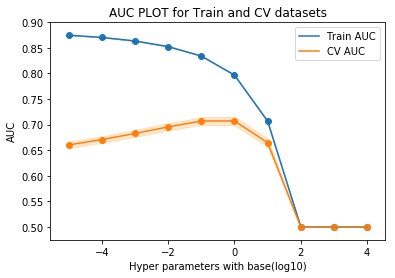

In [57]:
grid_search_plot(MultinomialNB(class_prior=[0.5,0.5]),'alpha',alpha_vals,X_train_bow,y_train)

In [58]:
best_model=MultinomialNB(alpha=10**0,class_prior=[0.5,0.5])

ROC Curve for Train and Test Data


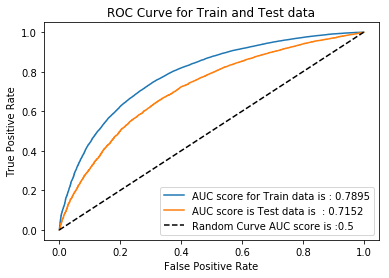

Confusion Matrix for Train


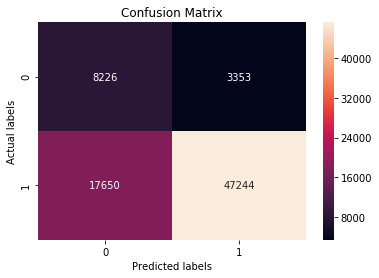

Confusion Matrix for Test


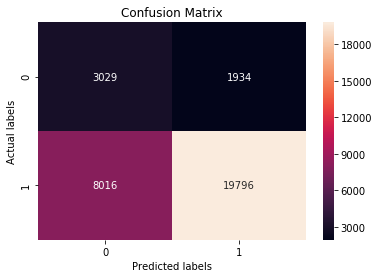

In [59]:
build_best_model_plot_roc(best_model,X_train_bow,y_train,X_test_bow,y_test)

Top 20 Features :
+------------------+--------------------+-------------------+
| Feature Priority |    Feature Name    | Feature Imp Value |
+------------------+--------------------+-------------------+
|        1         |      students      |      -4.9888      |
+------------------+--------------------+-------------------+
|        2         |        need        |      -5.0259      |
+------------------+--------------------+-------------------+
|        3         |       nannan       |      -5.1211      |
+------------------+--------------------+-------------------+
|        4         | literacy_language  |      -5.7897      |
+------------------+--------------------+-------------------+
|        5         |   grades_prek_2    |      -5.9809      |
+------------------+--------------------+-------------------+
|        6         |    math_science    |      -6.0569      |
+------------------+--------------------+-------------------+
|        7         |     grades_3_5     |      -6.14

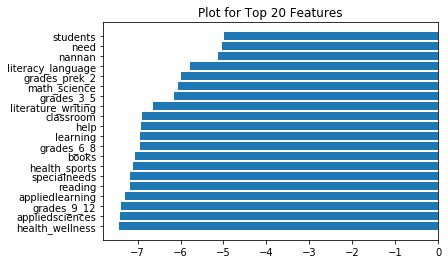

In [60]:

plot_top_n_features(best_model,X_train_bow,y_train,20,bog_features)

##  TF-IDF

In [61]:
tfidf_features=tuple(features)

### essay

In [62]:
tf_idf_vectorizer=TfidfVectorizer(ngram_range=(1,1),min_df=5)
tf_idf_vectorizer.fit(X_train.essay.values)
X_tr_essay=tf_idf_vectorizer.transform(X_train.essay.values)
X_te_essay=tf_idf_vectorizer.transform(X_test.essay.values)


tfidf_features=tfidf_features+(tuple(tf_idf_vectorizer.get_feature_names()))

###  project_title

In [63]:
tf_idf_vectorizer=TfidfVectorizer(ngram_range=(1,1),min_df=5)
tf_idf_vectorizer.fit(X_train.project_title.values)
X_tr_title=tf_idf_vectorizer.transform(X_train.project_title.values)
X_te_title=tf_idf_vectorizer.transform(X_test.project_title.values)

tfidf_features=tfidf_features+(tuple(tf_idf_vectorizer.get_feature_names()))


### project_resource_summary

In [64]:
tf_idf_vectorizer=TfidfVectorizer(ngram_range=(1,1),min_df=5)
tf_idf_vectorizer.fit(X_train.project_resource_summary.values)
X_tr_resource=tf_idf_vectorizer.transform(X_train.project_resource_summary.values)
X_te_resource=tf_idf_vectorizer.transform(X_test.project_resource_summary.values)

tfidf_features=tfidf_features+(tuple(tf_idf_vectorizer.get_feature_names()))

In [65]:
X_train_tfidf=hstack((X_tr_vec,X_tr_essay,X_tr_title,X_tr_resource)).tocsr()
X_test_tfidf=hstack((X_te_vec,X_te_essay,X_te_title,X_te_resource)).tocsr()

In [66]:
print("TF-IDF:")
print("Training data set shape :",X_train_tfidf.shape)
print("Test data set shape :",X_test_tfidf.shape)

TF-IDF:
Training data set shape : (76473, 30433)
Test data set shape : (32775, 30433)


In [67]:
X_train_tfidf[X_train_tfidf<0]=0

In [68]:
print("Hyper Param Values:",alpha_vals)

Hyper Param Values: [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]


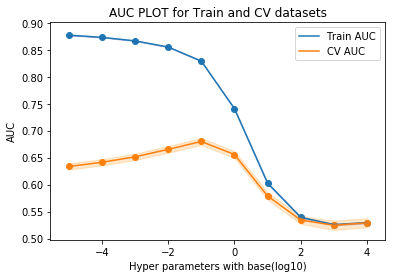

In [69]:
grid_search_plot(MultinomialNB(class_prior=[0.5,0.5]),'alpha',alpha_vals,X_train_tfidf,y_train)

In [70]:
best_model=MultinomialNB(alpha=10**-1,class_prior=[0.5,0.5])

ROC Curve for Train and Test Data


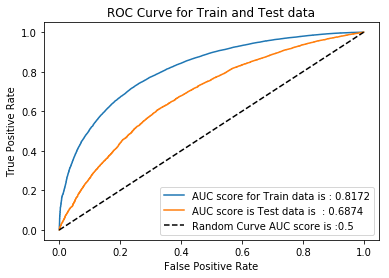

Confusion Matrix for Train


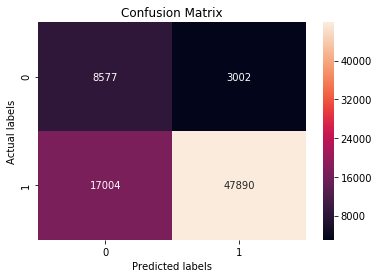

Confusion Matrix for Test


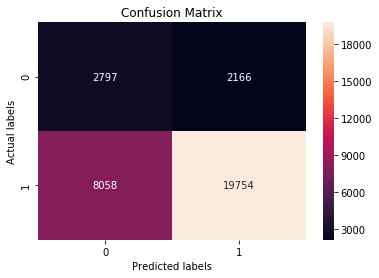

In [71]:
build_best_model_plot_roc(best_model,X_train_tfidf,y_train,X_test_tfidf,y_test)


Top 20 Features :
+------------------+----------------------+-------------------+
| Feature Priority |     Feature Name     | Feature Imp Value |
+------------------+----------------------+-------------------+
|        1         |  literacy_language   |      -3.6823      |
+------------------+----------------------+-------------------+
|        2         |    grades_prek_2     |      -3.8735      |
+------------------+----------------------+-------------------+
|        3         |     math_science     |      -3.9495      |
+------------------+----------------------+-------------------+
|        4         |      grades_3_5      |      -4.0399      |
+------------------+----------------------+-------------------+
|        5         |  literature_writing  |      -4.5402      |
+------------------+----------------------+-------------------+
|        6         |      grades_6_8      |      -4.8382      |
+------------------+----------------------+-------------------+
|        7         |  

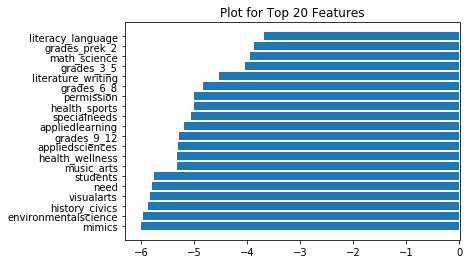

In [72]:
plot_top_n_features(best_model,X_train_tfidf,y_train,20,bog_features)

## Summary

In [74]:
summary_table = PrettyTable()
summary_table.hrules=True
summary_table.field_names = ["Vectorizer", "Model","Traindata shape","Testdata shape","Best Alpha","Train AUC", "Test AUC"]
summary_table.add_row(["BOW", 'GridSearchCv', (76473, 30433),(32775, 30433),1, .7895,.7152])
summary_table.add_row(["TF-IDF", 'GridSearchCv', (76473, 30433),(32775, 30433),0.1, .8172,.6874])
print(summary_table)

+------------+--------------+-----------------+----------------+------------+-----------+----------+
| Vectorizer |    Model     | Traindata shape | Testdata shape | Best Alpha | Train AUC | Test AUC |
+------------+--------------+-----------------+----------------+------------+-----------+----------+
|    BOW     | GridSearchCv |  (76473, 30433) | (32775, 30433) |     1      |   0.7895  |  0.7152  |
+------------+--------------+-----------------+----------------+------------+-----------+----------+
|   TF-IDF   | GridSearchCv |  (76473, 30433) | (32775, 30433) |    0.1     |   0.8172  |  0.6874  |
+------------+--------------+-----------------+----------------+------------+-----------+----------+
